### Step 1: Importing required libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Step 2: Load the dataset and its features

In [2]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


### Step 3: Visualize the dataset

In [8]:
data = sns.load_dataset("iris")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


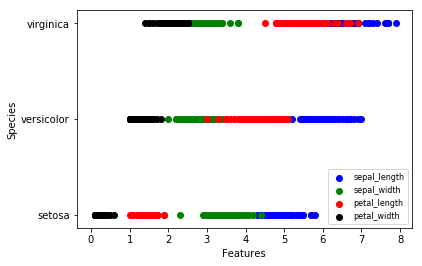

In [9]:
# Plot the relation of each feature with each species

plt.xlabel('Features')
plt.ylabel('Species')

pltX = data.loc[:, 'sepal_length']
pltY = data.loc[:,'species']
plt.scatter(pltX, pltY, color='blue', label='sepal_length')

pltX = data.loc[:, 'sepal_width']
pltY = data.loc[:,'species']
plt.scatter(pltX, pltY, color='green', label='sepal_width')

pltX = data.loc[:, 'petal_length']
pltY = data.loc[:,'species']
plt.scatter(pltX, pltY, color='red', label='petal_length')

pltX = data.loc[:, 'petal_width']
pltY = data.loc[:,'species']
plt.scatter(pltX, pltY, color='black', label='petal_width')

plt.legend(loc=4, prop={'size':8})
plt.show()


### Step 4: Spliting the dataset into training and testing set

In [10]:
x=iris.data
y=iris.target

In [11]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=1)

In [12]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 4)
(38, 4)
(112,)
(38,)


### Step 5: Fitting Logistic Regression to the Training set

In [19]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto',max_iter=1000)
classifier.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

### Step 6: Predicting the Test set results 

In [21]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)
# Predict probabilities
probs_y=classifier.predict_proba(x_test)

In [22]:
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0])

In [25]:
### Print results 
probs_y = np.round(probs_y, 2)
probs_y

array([[0.98, 0.02, 0.  ],
       [0.28, 0.72, 0.  ],
       [0.01, 0.88, 0.11],
       [0.98, 0.02, 0.  ],
       [0.  , 0.02, 0.98],
       [0.  , 0.62, 0.38],
       [0.  , 0.14, 0.86],
       [0.96, 0.04, 0.  ],
       [0.97, 0.03, 0.  ],
       [0.  , 0.03, 0.97],
       [0.02, 0.87, 0.11],
       [0.96, 0.04, 0.  ],
       [0.  , 0.03, 0.97],
       [0.01, 0.79, 0.2 ],
       [0.01, 0.74, 0.26],
       [0.99, 0.01, 0.  ],
       [0.02, 0.93, 0.05],
       [0.01, 0.66, 0.32],
       [0.96, 0.04, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.01, 0.83, 0.15],
       [0.01, 0.63, 0.36],
       [0.  , 0.44, 0.56],
       [0.98, 0.02, 0.  ],
       [0.  , 0.06, 0.94],
       [0.03, 0.89, 0.08],
       [0.99, 0.01, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.  , 0.79, 0.2 ],
       [0.  , 0.26, 0.74],
       [0.01, 0.75, 0.25],
       [0.  , 0.02, 0.98],
       [0.03, 0.94, 0.03],
       [0.  , 0.04, 0.96],
       [0.  , 0.05, 0.95],
       [0.97, 0.03, 0.  ],
       [0.02, 0.91, 0.07],
 

In [31]:
res = "{:<10} | {:<10} | {:<10} | {:<13} | {:<5}".format("y_test", "y_pred", "Setosa(%)", "versicolor(%)", "virginica(%)\n")
res += "-"*65+"\n"
res += "\n".join("{:<10} | {:<10} | {:<10} | {:<13} | {:<10}".format(x, y, a, b, c) for x, y, a, b, c in zip(y_test, y_pred, probs_y[:,0], probs_y[:,1], probs_y[:,2]))
res += "\n"+"-"*65+"\n"
print(res)

y_test     | y_pred     | Setosa(%)  | versicolor(%) | virginica(%)
-----------------------------------------------------------------
0          | 0          | 0.98       | 0.02          | 0.0       
1          | 1          | 0.28       | 0.72          | 0.0       
1          | 1          | 0.01       | 0.88          | 0.11      
0          | 0          | 0.98       | 0.02          | 0.0       
2          | 2          | 0.0        | 0.02          | 0.98      
1          | 1          | 0.0        | 0.62          | 0.38      
2          | 2          | 0.0        | 0.14          | 0.86      
0          | 0          | 0.96       | 0.04          | 0.0       
0          | 0          | 0.97       | 0.03          | 0.0       
2          | 2          | 0.0        | 0.03          | 0.97      
1          | 1          | 0.02       | 0.87          | 0.11      
0          | 0          | 0.96       | 0.04          | 0.0       
2          | 2          | 0.0        | 0.03          | 0.97      
1       

### Step 7: Calculate to  accuracy of the model

In [33]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred)

cm

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)